In [18]:
%matplotlib inline
import random
import colorednoise as cn

In [19]:
beta = 1 # the exponent
samples = 2**13 # number of samples to generate
X = cn.powerlaw_psd_gaussian(beta, samples)

In [20]:
import csv
from datetime import datetime
with open(f'../datasets/pn_{datetime.utcnow()}.csv', 'w', newline='') as csvfile:
    ds_writer = csv.writer(csvfile, delimiter=',',
                            quotechar='|', quoting=csv.QUOTE_MINIMAL)
    ds_writer.writerow(X)

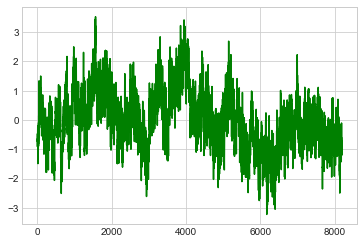

In [21]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
plt.plot(X, color = "green")
plt.show()

In [22]:
import numpy as np
ts = np.array(X)

In [23]:
ts.mean()

-0.005920479489017416

In [24]:
ts.std()

0.9859165416374401

In [25]:
from math import ceil, floor
def DDF(series):
    return np.histogram(series, bins=int(ceil(max(series))-floor(min(series))), density=True)    

def E(series):
    x, p = DDF(series)
    return sum([x[i] * p[i] for i in range(len(x))])

def Var(series): 
    p, x = DDF(series)
    u = E(series)
    return sum([p[i] * ((x[i] - u)**2) for i in range(len(p))])

In [26]:
mu = E(X)
sigma = Var(X)
print (f"mu = {mu} sigma={sigma}")

mu = -0.5083784036750572 sigma=1.2259567982878616


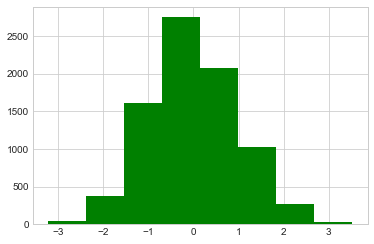

In [27]:
from math import floor, ceil
count, bins, ignored  = plt.hist(X, int(ceil(max(X))-floor(min(X))), color='green')